## Final Project Submission

Please fill out:
* Student name: Harriet Joseph
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: Samuel Jane 
* Blog post URL:


# 1. BUSINESS UNDERSTANDING

# Stakeholder:
The stakeholder for this dataset could be a real estate agency or a property management company that deals with buying, selling, and renting houses in King County. They might be interested in analyzing this dataset to gain insights into the housing market of the county and improve their business decisions and also give accurate advice to homeowners on how to increase the value of their homes and by what amount

# Business problem:
The business problem that this stakeholder might face is determining the factors that influence house prices in the county. By understanding these factors, they could price their properties more accurately, invest in the right locations, and negotiate better deals with buyers and sellers. The stakeholder might also be interested in identifying the most desirable neighborhoods and property features that attract buyers and renters, so that they can focus their marketing efforts and increase their sales and revenue. 
In summary, the stakeholder wants to use regression modeling to predict house prices and gain insights into the factors that affect house values in King County.

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv and description of the column names can be found in column_names.md.

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# 2.DATA UNDERSTANDING

# loading data

In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the king county house sales dataset
df = pd.read_csv('kc_house_data.csv', index_col = 0)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [3]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [5]:
print(df.describe())


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19221.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007596      0.233863      3.409825      7.657915   
std        0.539683      0.086825      0.765686    

* to understand the distribbution of the data plot histogram for all columns

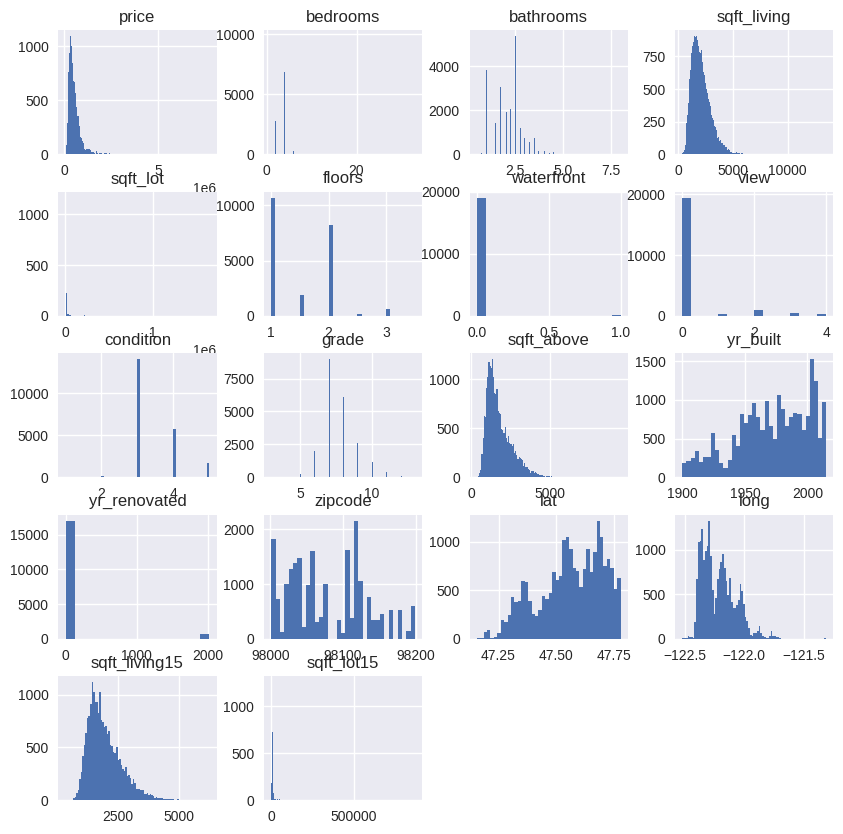

In [6]:
plt.style.use('seaborn')
# Create histograms for all variables
df.hist(figsize=(10,10), bins= 'auto')
plt.show()

In [7]:
#our target variable is the price
#The dataset contains information about house sales in King County, Washington state, USA. 
#There are 21,597 entries (rows) and 20 columns. 
#Each row represents a different house sale and each column represents a different attribute of the house

#with over 20,000 observations, we likely have enough data to build a reasonably complex model.
#The distribution of the data is not very well specified for all the predictors at this stage, but we know from the 
#summary statistics provided that the price has a wide range of values,
#with a mean of $540,296 and a standard deviation of $367,368.

#comprises of  are continuous,discrete and categorical data as shown in the plot above.

# 3.DATA PREPARATION

* **DROP IRRELEVANT COLUMNS**

In [8]:
# Declare relevant columns
relevant_columns = [
    'price',   #price of houses
    'bedrooms',   #number of bedrooms
    'bathrooms',   #number of bathrooms
    'sqft_living', #square - footage of the home
    'sqft_lot',     #square - footage of the lot
    'floors',      #floors(level) of the house
    'waterfront',  #House which has a view to a waterfront 
    'condition',#How good the condition is ( Overall )
    'grade', #overall grade given to the housing unit, based on King County grading system
    'view',        #has it been viewed
    'yr_built',     #Built Year
    'yr_renovated', # Year when house was renovated
    'zipcode',      #zip
    'sqft_above',   #square footage of house apart from basement
    'sqft_basement' #square footage of the basement
]
    

# Reassign dataframe so that it only contains relevant columns
df = df.loc[:, relevant_columns]

# Visually inspect new dataframe
df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,view,yr_built,yr_renovated,zipcode,sqft_above,sqft_basement
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,0.0,1955,0.0,98178,1180,0.0
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,0.0,1951,1991.0,98125,2170,400.0
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,NaN,98028,770,0.0
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,0.0,1965,0.0,98136,1050,910.0
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,1680,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0,2009,0.0,98103,1530,0.0
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0,2014,0.0,98146,2310,0.0
1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0,2009,0.0,98144,1020,0.0


In [9]:
#check that the shape is correct
# X_train should have the same number of rows as before
assert df.shape[0] == 21597

# Now X_train should only have as many columns as relevant_columns
assert df.shape[1] == len(relevant_columns)

* **HANDLING MISSING VALUES**

In [10]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
view               63
yr_built            0
yr_renovated     3842
zipcode             0
sqft_above          0
sqft_basement       0
dtype: int64

Ok, it looks like we have some NaNs in waterfront, view and yr_renovated,
do these NaNs actually represent *missing* values, or is there some real value/category being represented by NaN?

* begin with yr_renovated

In [11]:
#yr_renovated is not categorical ,therefore we can assume that zero represents houses that have never been renovated
#therefore fill missing values with zeroes
df['yr_renovated'].fillna(0, inplace=True)

* then views
we realise that the view is categorical ranges from 0 to 4, since it represents small percentage we can drop thr rows with NANs

In [12]:
df.dropna(subset=['view'], inplace=True)

* lastly check on waterfront.
**waterfront is a categorical data, where o represents, house has no view to a waterfront and 1 represents a house with a view to a waterfront**

In [13]:
# inspecting the waterfront column
print(df['waterfront'].value_counts())
print(df['waterfront'].unique())

0.0    19019
1.0      145
Name: waterfront, dtype: int64
[nan  0.  1.]


In [14]:
# Calculate the mode of the waterfront column
waterfront_mode = df['waterfront'].mode()[0]

# Fill in the missing values with the mode
df['waterfront'] = df['waterfront'].fillna(waterfront_mode)


In [15]:
print(df['waterfront'].unique())

[0. 1.]


In [16]:
#check again if the changes were made
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
view             0
yr_built         0
yr_renovated     0
zipcode          0
sqft_above       0
sqft_basement    0
dtype: int64

* **CONVERT CATEGORICAL VALUES TO NUMBERS**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   waterfront     21534 non-null  float64
 7   condition      21534 non-null  int64  
 8   grade          21534 non-null  int64  
 9   view           21534 non-null  float64
 10  yr_built       21534 non-null  int64  
 11  yr_renovated   21534 non-null  float64
 12  zipcode        21534 non-null  int64  
 13  sqft_above     21534 non-null  int64  
 14  sqft_basement  21534 non-null  object 
dtypes: float64(6), int64(8), object(1)
memory usage: 2.6+ MB


In [18]:
print(df['sqft_basement'].value_counts())

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
3480.0        1
1840.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 302, dtype: int64


* **data type conversion**

In [19]:
#sqft_basement and date are in object data type
#convert the sqft_basement type to float64
#the column has a special character ? remove that first
df = df[df['sqft_basement'] != '?']
df['sqft_basement'] = df['sqft_basement'].astype('float64')


In [20]:
#check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21082 non-null  float64
 1   bedrooms       21082 non-null  int64  
 2   bathrooms      21082 non-null  float64
 3   sqft_living    21082 non-null  int64  
 4   sqft_lot       21082 non-null  int64  
 5   floors         21082 non-null  float64
 6   waterfront     21082 non-null  float64
 7   condition      21082 non-null  int64  
 8   grade          21082 non-null  int64  
 9   view           21082 non-null  float64
 10  yr_built       21082 non-null  int64  
 11  yr_renovated   21082 non-null  float64
 12  zipcode        21082 non-null  int64  
 13  sqft_above     21082 non-null  int64  
 14  sqft_basement  21082 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 2.6 MB


In [21]:
# Print a summary of the dataset
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,view,yr_built,yr_renovated,zipcode,sqft_above,sqft_basement
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,1180,0.0
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,0.0,1951,1991.0,98125,2170,400.0
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,770,0.0
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,0.0,1965,0.0,98136,1050,910.0
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,1680,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0,2009,0.0,98103,1530,0.0
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0,2014,0.0,98146,2310,0.0
1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0,2009,0.0,98144,1020,0.0


* **CHECK FOR MULTICOLLINEARITY**

In [22]:
relevant_columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'view',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'sqft_above',
 'sqft_basement']

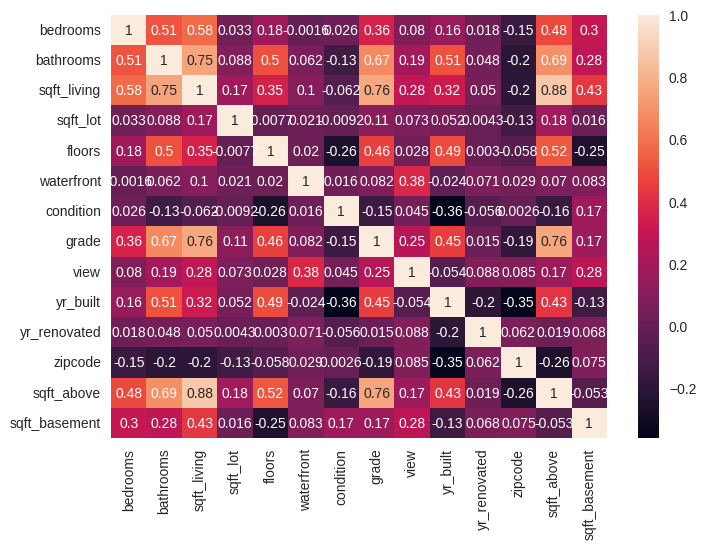

In [23]:
# checking for multicollinearity
# we can use a heatmap to visualize how the variables are correlated

# create a DataFrame from the relevant columns
relevant_df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition','grade', 
                  'view', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_above', 'sqft_basement']]

# select the features to include in the correlation matrix
features = relevant_df.drop('price', axis=1)

# create a correlation matrix
corr = features.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True)
plt.show()

the heatmap shows that sqft_above ,bathrooms, sqft_living and grade are highly correlated with a value above 0.75.
this can affect or model

* continue to explore and watch for multicollinearity explicitly

In [24]:
# Creating a new dataframe containing the independant variables
df_multcol = df.iloc[:,1:15]
df_multcol.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,view,yr_built,yr_renovated,zipcode,sqft_above,sqft_basement
id,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,1180,0.0
6414100192,3,2.25,2570,7242,2.0,0.0,3,7,0.0,1951,1991.0,98125,2170,400.0
5631500400,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,770,0.0
2487200875,4,3.00,1960,5000,1.0,0.0,5,7,0.0,1965,0.0,98136,1050,910.0
1954400510,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,1680,0.0


In [25]:
abs(df_multcol.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,view,yr_built,yr_renovated,zipcode,sqft_above,sqft_basement
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,True,False,False,False,False,True,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False


to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1; use stack and zip

In [26]:
#save absolute value of correlation matrix as a dataframe
#convert all values to absolute value
#stack row ;column pairs into multiindex
#reset the index to set the multindex to seperate columns
#sort values
#  create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.
df_new = df_multcol.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_new['pairs'] = list(zip(df_new.level_0, df_new.level_1))

# set index to pairs
df_new.set_index(['pairs'], inplace = True)

#d rop level columns
df_new.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_new.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_new.drop_duplicates(inplace=True)

Which varibles are highly correlated in the Ames Housing data set?

In [27]:
# write answer here
df_new[(df_new.cc > .75) & (df_new.cc < 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876787
"(grade, sqft_living)",0.762719
"(grade, sqft_above)",0.756289
"(bathrooms, sqft_living)",0.754793


There are four sets of variales that are highly correlated.

square - footage of the home(sqft_living) with square footage of house apart from basement(sqft_above),  overall grade given to the housing unit, based on King County grading system(grade) with square footage of house apart from basement(sqft_above) , number of bathrooms(bathrooms) with square - footage of the home(sqft_living) and overall grade given to the housing unit, based on King County grading system(grade) with square - footage of the home(sqft_living). 


Since four different pairs of variables are highly correlated, the correct approach would be to drop one variable from each pair.

one approach would be to drop sqft_living and sqft_above
since the two columns cause multicollinearity in all the two pairs.


* address multicollinearity

In [28]:
df.drop(columns=['sqft_living', 'sqft_above'], axis = 1, inplace=True)

In [29]:
#since we have already solved the multicollinearity, add back the 'price column to the new dataframe
# Adding price to the new dataframe
df_new = pd.DataFrame([])
df_new['price'] = df['price']
df_new['sqft_lot'] = df_multcol['sqft_lot']
df_new['bedrooms'] = df_multcol['bedrooms']
df_new['grade'] = df_multcol['grade']
df_new['bathrooms'] = df_multcol['bathrooms']
df_new['floors'] = df_multcol['floors']
df_new['waterfront'] = df_multcol['waterfront']
df_new['condition'] = df_multcol['condition']
df_new['yr_built'] = df_multcol['yr_built']
df_new['yr_renovated'] = df_multcol['yr_renovated']
df_new['zipcode'] = df_multcol['zipcode']
df_new['view'] = df_multcol['view']
df_new['sqft_basement'] = df_multcol['sqft_basement']
df_new.head()

,price,sqft_lot,bedrooms,grade,bathrooms,floors,waterfront,condition,yr_built,yr_renovated,zipcode,view,sqft_basement
id,,,,,,,,,,,,,
7129300520,221900.0,5650,3,7,1.00,1.0,0.0,3,1955,0.0,98178,0.0,0.0
6414100192,538000.0,7242,3,7,2.25,2.0,0.0,3,1951,1991.0,98125,0.0,400.0
5631500400,180000.0,10000,2,6,1.00,1.0,0.0,3,1933,0.0,98028,0.0,0.0
2487200875,604000.0,5000,4,7,3.00,1.0,0.0,5,1965,0.0,98136,0.0,910.0
1954400510,510000.0,8080,3,8,2.00,1.0,0.0,3,1987,0.0,98074,0.0,0.0


* **UNIVARIATE ANALYSIS**

*look at the target variable 'price'

count    2.108200e+04
mean     5.402469e+05
std      3.667323e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


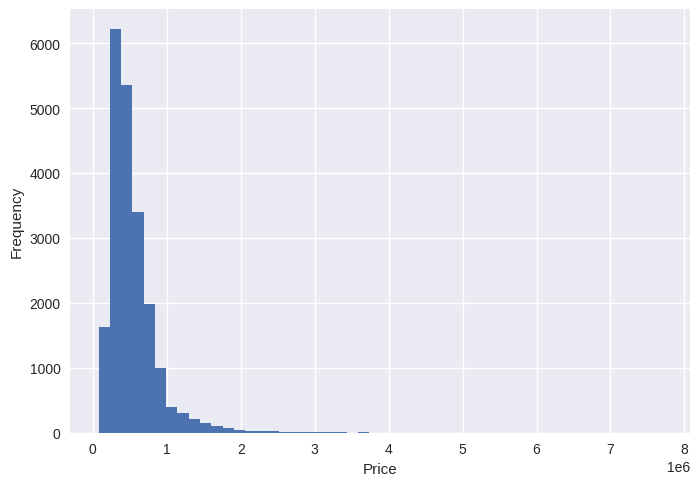

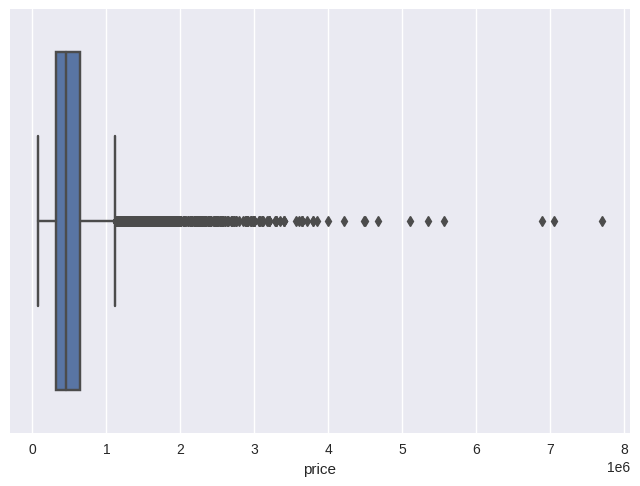

Skewness: 3.9864235583473797
Kurtosis: 34.06885359727446


In [30]:
# Describe the target variable (price)
print(df_new['price'].describe())

# Create a histogram of the target variable
plt.hist(df_new['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a boxplot of the target variable
sns.boxplot(x=df_new['price'])
plt.show()

# Calculate and display skewness and kurtosis of the target variable
print('Skewness:', df_new['price'].skew())
print('Kurtosis:', df_new['price'].kurt())

In [31]:
# the minumum and maximum price of houses
print(df_new['price'].min())
print(df_new['price'].max())

78000.0
7700000.0


In [32]:

# inspecting the categorical variables
category_var = ['condition', 'grade', 'waterfront', 'floors', 'bedrooms', 'bathrooms']
for var in category_var:
    print(df_new[var].unique())
    print(df_new[var].nunique())
    print(df_new[var].value_counts())
    print('Skewness:', df_new[var].skew())
    print('Kurtosis:', df_new[var].kurt())

[3 5 4 1 2]
5
3    13688
4     5538
5     1662
2      166
1       28
Name: condition, dtype: int64
Skewness: 1.0374274032201312
Kurtosis: 0.5179783602596544
[ 7  6  8 11  9  5 10 12  4  3 13]
11
7     8762
8     5922
9     2546
6     1991
10    1108
11     389
5      235
12      88
4       27
13      13
3        1
Name: grade, dtype: int64
Skewness: 0.7906836388778936
Kurtosis: 1.1457571368979305
[0. 1.]
2
0.0    20941
1.0      141
Name: waterfront, dtype: int64
Skewness: 12.105590319616745
Kurtosis: 144.55903095440306
[1.  2.  1.5 3.  2.5 3.5]
6
1.0    10427
2.0     8043
1.5     1858
3.0      593
2.5      154
3.5        7
Name: floors, dtype: int64
Skewness: 0.6139707937597055
Kurtosis: -0.4928161646252489
[ 3  2  4  5  1  6  7  8  9 11 10 33]
12
3     9607
4     6724
2     2685
5     1555
6      260
1      191
7       36
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
Skewness: 2.067805096986956
Kurtosis: 51.3155717568753
[1.   2.25 3.   2.   4.5  

The skewness of the 'condition' variable is positive, indicating that the distribution is slightly skewed towards higher values. The kurtosis of this variable is greater than 3, indicating that the distribution has heavier tails than a normal distribution.

The skewness of the 'grade' variable is positive, indicating that the distribution is slightly skewed towards higher values. The kurtosis of this variable is less than 3, indicating that the distribution is less peaked and has lighter tails than a normal distribution.

The 'waterfront' variable has missing values, hence skewness and kurtosis cannot be computed.

The skewness of the 'floors' variable is positive, indicating that the distribution is slightly skewed towards higher values. The kurtosis of this variable is less than 3, indicating that the distribution is less peaked and has lighter tails than a normal distribution.

The skewness of the 'bedrooms' variable is negative, indicating that the distribution is slightly skewed towards lower values. The kurtosis of this variable is greater than 3, indicating that the distribution has heavier tails than a normal distribution.

The skewness of the 'bathrooms' variable is negative, indicating that the distribution is slightly skewed towards lower values. The kurtosis of this variable is less than 3, indicating that the distribution is less peaked and has lighter tails than a normal distribution.









In [33]:
df_new['bedrooms'].value_counts()

3     9607
4     6724
2     2685
5     1555
6      260
1      191
7       36
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

from this summary, notice that there is an outlier , where a house that has 33 bedrooms and the price is relatively low. this seems to be a mistake made during data entry

In [34]:
# dropping bedrooms outlier
df_new = df_new[df_new['bedrooms'] != 33]
df_new['bedrooms'].unique()


array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

* **BIVARIATE ANALYSIS**


* checking the the relationship between the target (price) and independant variables

In [35]:
print(df_new.dtypes)

price            float64
sqft_lot           int64
bedrooms           int64
grade              int64
bathrooms        float64
floors           float64
waterfront       float64
condition          int64
yr_built           int64
yr_renovated     float64
zipcode            int64
view             float64
sqft_basement    float64
dtype: object


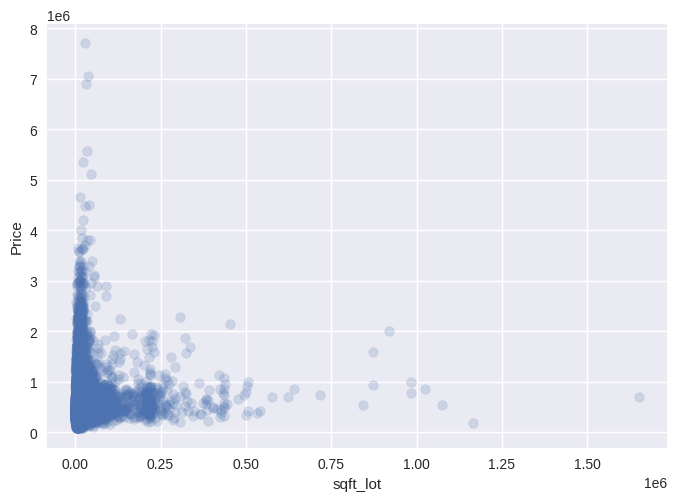

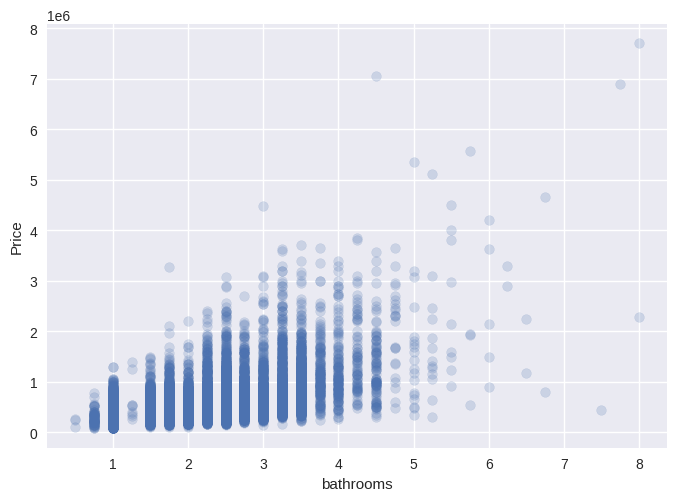

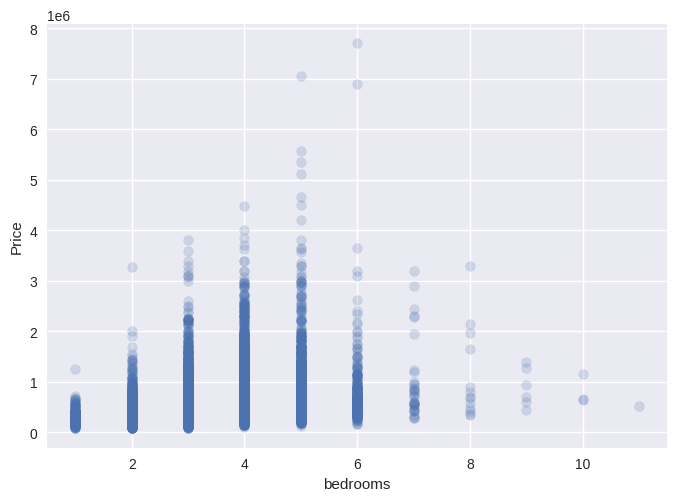

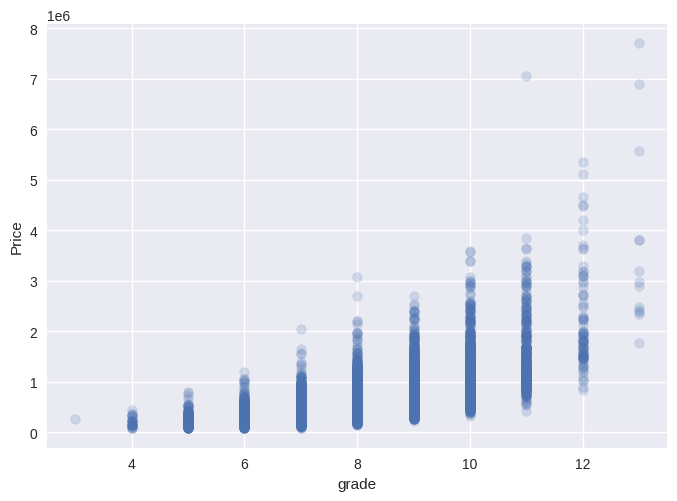

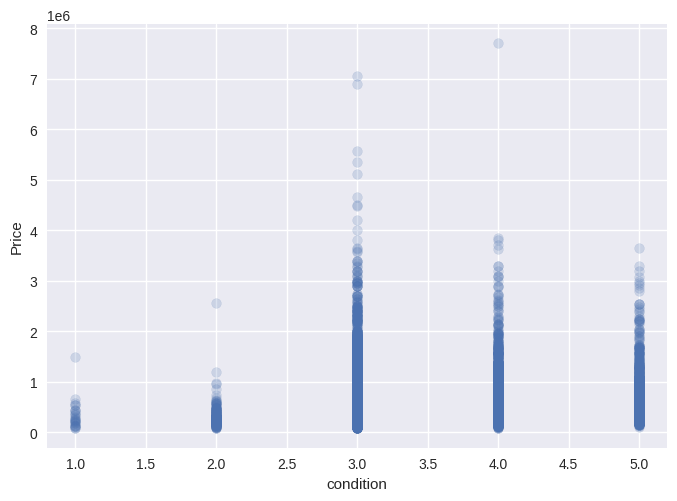

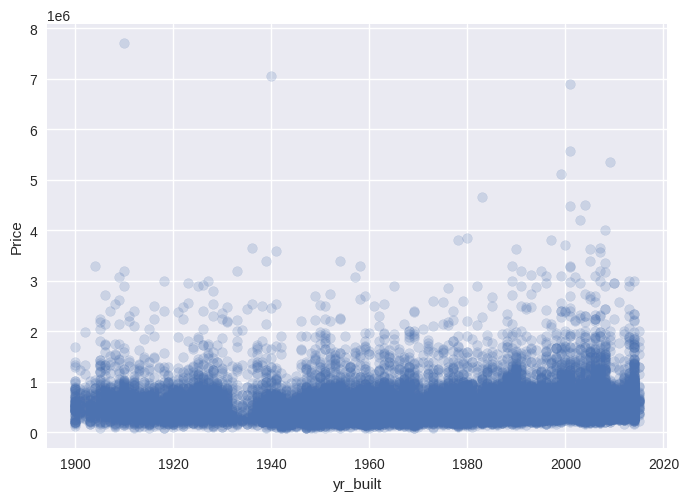

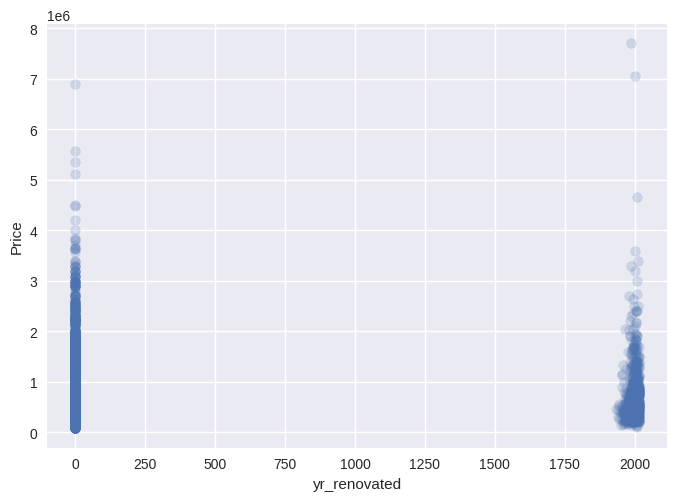

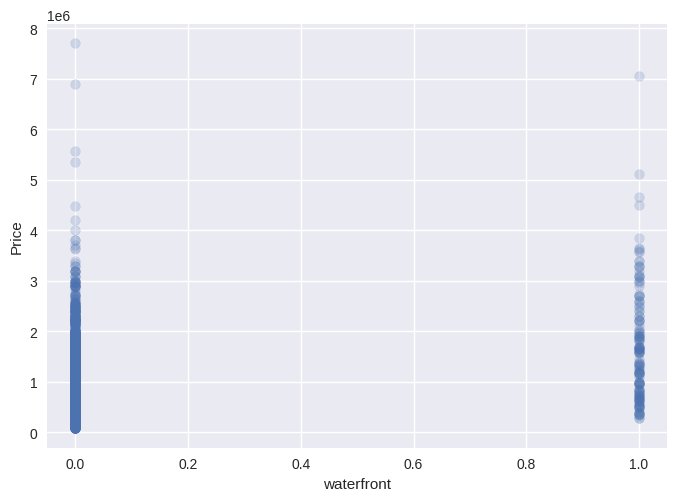

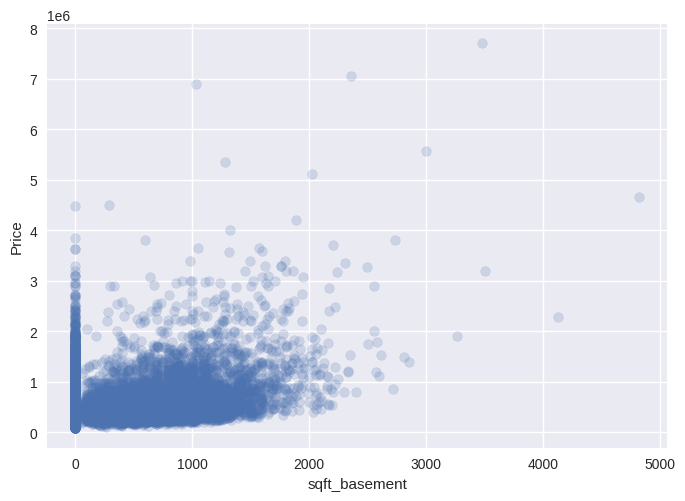

In [36]:
columns = ['sqft_lot', 'bathrooms', 'bedrooms', 'grade', 'condition', 'yr_built', 'yr_renovated', 'waterfront', 'sqft_basement',]
#plot a scatter matrix showing bivariate relationship
for col in columns:
    plt.scatter(df_new[col], df_new['price'], alpha=0.2)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()








* overall summary analysis from the data preprocessing

we can see that the distribution of the target variable "price" is right-skewed, meaning that it has a few houses with very high prices, but most houses are priced lower.

The variables "sqft_living" and "sqft_above" are highly positively correlated with the target variable "price," which suggests that these variables could be good predictors of house prices.

The "condition" and "bedrooms" variables have moderate positive skewness, which indicates that the majority of the houses in the dataset have average or above-average conditions and bedrooms.

The "grade" variable has a low positive skewness, indicating that most of the houses in the dataset have above-average grades.

The "floors" variable has a low positive skewness, indicating that most of the houses have one or two floors.

The "bathrooms" variable has a moderate negative skewness, indicating that most of the houses in the dataset have fewer bathrooms than the average.

The "waterfront" variable has missing values, and therefore, we cannot analyze its skewness or kurtosis. Overall, the dataset seems to be moderately skewed and not highly kurtotic.







# 3. MODELING

* **Regression**

perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot the residuals using sm.graphics.plot_regress_exog()
* Plot a Q-Q plot for regression residuals normality test
* Store following values in array for each iteration:
* Independent Variable
* r_squared'
* intercept'
* 'slope'
* 'p-value'
* 'normality (JB)'
* Comment on each output

In [37]:
#IMPORT ALL NEEDED LIBRARIES
#linear regression model to this dataset.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

* **split data into training and test sets**

In [38]:
#splitting the data
train, test = train_test_split(df_new)

In [39]:
train

,price,sqft_lot,bedrooms,grade,bathrooms,floors,waterfront,condition,yr_built,yr_renovated,zipcode,view,sqft_basement
id,,,,,,,,,,,,,
3629920990,905000.0,7661,4,11,3.25,2.0,0.0,3,2006,0.0,98029,0.0,0.0
7732100150,749500.0,9727,4,9,2.50,2.0,0.0,3,1987,0.0,98052,0.0,0.0
4030500130,243500.0,15188,4,7,2.50,2.0,0.0,4,1966,0.0,98042,0.0,0.0
5347200162,210000.0,1157,2,7,1.50,2.0,0.0,3,2007,0.0,98126,0.0,0.0
2767603215,490000.0,2400,3,8,2.00,1.5,0.0,3,1900,2003.0,98107,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4141800030,920000.0,4000,3,8,1.75,1.0,0.0,3,1948,2014.0,98122,0.0,1240.0
5100404030,523000.0,5413,3,8,1.75,2.0,0.0,4,1963,0.0,98115,0.0,1100.0
1760650880,327000.0,3825,4,7,2.50,2.0,0.0,3,2013,0.0,98042,0.0,0.0


In [40]:
test

,price,sqft_lot,bedrooms,grade,bathrooms,floors,waterfront,condition,yr_built,yr_renovated,zipcode,view,sqft_basement
id,,,,,,,,,,,,,
9423800030,250000.0,7470,3,5,1.00,1.0,0.0,4,1917,0.0,98065,0.0,0.0
3353404510,305000.0,186872,2,6,1.00,1.5,0.0,4,1936,0.0,98001,0.0,0.0
7785380150,469950.0,6427,4,8,2.75,1.0,0.0,3,2008,0.0,98146,0.0,1070.0
2742100250,550000.0,17745,4,8,3.50,2.0,0.0,3,1955,0.0,98108,2.0,1380.0
8118600080,565000.0,7980,4,7,2.00,1.5,0.0,4,1940,0.0,98146,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178500440,279900.0,6600,3,7,2.00,1.0,0.0,4,1990,0.0,98042,0.0,0.0
7852170140,650000.0,5438,4,9,2.50,2.0,0.0,3,2003,0.0,98065,0.0,0.0
3028200100,216000.0,9000,2,6,1.00,1.0,0.0,4,1942,0.0,98168,0.0,0.0


In [41]:
# Split the data into features and target variable
X = df_new.drop('price', axis=1)
y = df_new['price']

# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
X_train

,sqft_lot,bedrooms,grade,bathrooms,floors,waterfront,condition,yr_built,yr_renovated,zipcode,view,sqft_basement
id,,,,,,,,,,,,
1324079029,213008,3,6,1.00,1.0,0.0,2,1933,0.0,98024,0.0,0.0
1245001739,12527,3,7,1.00,1.0,0.0,3,1972,0.0,98033,0.0,0.0
624110540,20822,4,10,3.25,2.0,0.0,3,1991,0.0,98077,0.0,0.0
9512200140,7163,3,9,2.00,1.0,0.0,3,2012,0.0,98058,0.0,0.0
7282900025,6874,3,6,1.00,1.0,0.0,3,1954,0.0,98133,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3888100117,9750,5,7,1.50,1.0,0.0,4,1966,0.0,98033,0.0,0.0
1775950030,15909,4,8,1.75,1.0,0.0,3,1974,0.0,98072,0.0,970.0
6204200470,6967,4,8,2.25,2.0,0.0,3,1986,0.0,98011,0.0,0.0


In [43]:
y_train

id
1324079029     200000.0
1245001739     550000.0
624110540     1180000.0
9512200140     479950.0
7282900025     250000.0
                ...    
3888100117     510000.0
1775950030     375000.0
6204200470     515000.0
7871500070     930000.0
4450700010     375000.0
Name: price, Length: 14756, dtype: float64

In [44]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

14756 6325 14756 6325


 **preparing data for modeling**

To avoid data leakage When using a train-test split, data preparation should happen after the split.


* **Log Transformation**

In [45]:
# Apply log transformation to all columns in X_train
X_train_log = X_train.apply(lambda x: np.log(x + 1))

# Apply the same transformation to X_test
X_test_log = X_test.apply(lambda x: np.log(x + 1))

#convert the log-transformed data to a DataFrame
X_train_log = pd.DataFrame(X_train_log, columns=X_train.columns)
X_test_log = pd.DataFrame(X_test_log, columns=X_test.columns)

# Replace training columns with transformed versions
X_train = X_train_log
X_test = X_test_log

In [46]:
X_train

,sqft_lot,bedrooms,grade,bathrooms,floors,waterfront,condition,yr_built,yr_renovated,zipcode,view,sqft_basement
id,,,,,,,,,,,,
1324079029,12.269090,1.386294,1.945910,0.693147,0.693147,0.0,1.098612,7.567346,0.0,11.492978,0.0,0.000000
1245001739,9.435721,1.386294,2.079442,0.693147,0.693147,0.0,1.386294,7.587311,0.0,11.493070,0.0,0.000000
624110540,9.943813,1.609438,2.397895,1.446919,1.098612,0.0,1.386294,7.596894,0.0,11.493518,0.0,0.000000
9512200140,8.876824,1.386294,2.302585,1.098612,0.693147,0.0,1.386294,7.607381,0.0,11.493325,0.0,0.000000
7282900025,8.835647,1.386294,1.945910,0.693147,0.693147,0.0,1.386294,7.578145,0.0,11.494089,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3888100117,9.185125,1.791759,2.079442,0.916291,0.693147,0.0,1.609438,7.584265,0.0,11.493070,0.0,0.000000
1775950030,9.674703,1.609438,2.197225,1.011601,0.693147,0.0,1.386294,7.588324,0.0,11.493467,0.0,6.878326
6204200470,8.849084,1.609438,2.197225,1.178655,1.098612,0.0,1.386294,7.594381,0.0,11.492845,0.0,0.000000


In [47]:
X_test

,sqft_lot,bedrooms,grade,bathrooms,floors,waterfront,condition,yr_built,yr_renovated,zipcode,view,sqft_basement
id,,,,,,,,,,,,
4178500100,8.875007,1.386294,2.079442,1.178655,1.098612,0.000000,1.609438,7.596392,0.000000,11.493161,0.000000,0.000000
3905090080,9.080346,1.609438,2.302585,1.252763,1.098612,0.000000,1.386294,7.597396,0.000000,11.493029,0.000000,0.000000
6819100122,8.131825,1.098612,2.079442,0.693147,0.693147,0.000000,1.386294,7.562681,0.000000,11.493845,0.000000,0.000000
3022039071,10.357489,1.098612,2.079442,1.178655,1.098612,0.693147,1.609438,7.574558,7.595387,11.493447,1.098612,0.000000
9558200025,9.052165,1.386294,2.079442,1.098612,1.098612,0.000000,1.609438,7.578657,0.000000,11.494242,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
546001020,8.305731,1.386294,2.079442,1.098612,0.693147,0.000000,1.386294,7.566311,0.000000,11.493926,0.000000,6.685861
3802000020,9.228573,1.609438,1.945910,0.693147,0.693147,0.000000,1.609438,7.584265,0.000000,11.492753,0.000000,0.000000
4310702440,7.825245,1.386294,2.079442,1.098612,1.098612,0.000000,1.386294,7.596894,0.000000,11.493783,0.000000,0.000000


* **one hot encoding**

In [48]:
# Instantiate OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Categorical columns
cat_columns = ['grade', 'bedrooms', 'bathrooms', 'condition', 'view', 'floors', 'waterfront']

# Fit encoder on training set
ohe.fit(X_train[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names_out(input_features=cat_columns)   #RENAMED get_feature_names TO get_feature_names_out

# Transform training set
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train[cat_columns]),
                           columns=new_cat_columns, index=X_train.index)

# Replace training columns with transformed versions
X_train = pd.concat([X_train.drop(cat_columns, axis=1), X_train_ohe], axis=1)
X_train

,sqft_lot,yr_built,yr_renovated,zipcode,sqft_basement,grade_1.3862943611198906,grade_1.6094379124341003,grade_1.791759469228055,grade_1.9459101490553132,grade_2.0794415416798357,...,view_1.3862943611198906,view_1.6094379124341003,floors_0.6931471805599453,floors_0.9162907318741551,floors_1.0986122886681098,floors_1.252762968495368,floors_1.3862943611198906,floors_1.5040773967762742,waterfront_0.0,waterfront_0.6931471805599453
id,,,,,,,,,,,,,,,,,,,,,
1324079029,12.269090,7.567346,0.0,11.492978,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1245001739,9.435721,7.587311,0.0,11.493070,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
624110540,9.943813,7.596894,0.0,11.493518,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9512200140,8.876824,7.607381,0.0,11.493325,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7282900025,8.835647,7.578145,0.0,11.494089,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888100117,9.185125,7.584265,0.0,11.493070,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1775950030,9.674703,7.588324,0.0,11.493467,6.878326,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6204200470,8.849084,7.594381,0.0,11.492845,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [49]:
# Transform testing set
X_test_ohe = pd.DataFrame(ohe.transform(X_test[cat_columns]),
                           columns=new_cat_columns, index=X_test.index)

# Replace testing columns with transformed versions
X_test = pd.concat([X_test.drop(cat_columns, axis=1), X_test_ohe], axis=1)
X_test

,sqft_lot,yr_built,yr_renovated,zipcode,sqft_basement,grade_1.3862943611198906,grade_1.6094379124341003,grade_1.791759469228055,grade_1.9459101490553132,grade_2.0794415416798357,...,view_1.3862943611198906,view_1.6094379124341003,floors_0.6931471805599453,floors_0.9162907318741551,floors_1.0986122886681098,floors_1.252762968495368,floors_1.3862943611198906,floors_1.5040773967762742,waterfront_0.0,waterfront_0.6931471805599453
id,,,,,,,,,,,,,,,,,,,,,
4178500100,8.875007,7.596392,0.000000,11.493161,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3905090080,9.080346,7.597396,0.000000,11.493029,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6819100122,8.131825,7.562681,0.000000,11.493845,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3022039071,10.357489,7.574558,7.595387,11.493447,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9558200025,9.052165,7.578657,0.000000,11.494242,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546001020,8.305731,7.566311,0.000000,11.493926,6.685861,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3802000020,9.228573,7.584265,0.000000,11.492753,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4310702440,7.825245,7.596894,0.000000,11.493783,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**Building, Evaluating, and Validating a Model**

now after preprocessing all the columns, fit a linear regression model:

In [50]:
#Fit a Linear Regression on the Training Data
#initialize model
linreg = LinearRegression()
#fit model to train data
linreg.fit(X_train, y_train)

#print the R_squared score of model on training data
print(f'Training R_squared score: {linreg.score(X_train, y_train):.3f}')

Training R_squared score: 0.673


**Evaluate and Validate Model**

* Generate Predictions on Training and Test Sets

In [51]:
#generate predictions for both sets

train_preds = linreg.predict(X_train)
test_preds = linreg.predict(X_test)
# print R_squared score of model for both test and train
print(f'Training R_squared score: {linreg.score(X_train, y_train):.3f}')
print(f'Test R_squared score: {linreg.score(X_test, y_test):.3f}')

Training R_squared score: 0.673
Test R_squared score: 0.667


In [52]:
# Compute the MSE of the model's predictions on the training and test sets
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Print the MSEs of the model on the training and test sets
print(f"Training MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")

Training MSE: 44501691158.127
Test MSE: 43505670403.860


The R-squared score measures the proportion of variation in the target variable that is explained by the model. In this case, the training R-squared score of 0.673 means that the model explains about 67.3% of the variation in the training set.

The test R-squared score of 0.667 means that the model explains about 66.7% of the variation in the test set.

The mean squared error (MSE) is a measure of the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance. The training MSE of 44501691158.127 means that, on average, the predicted house prices in the training set are off by about $44.5 billion. The test MSE of 43505670403.861 means that, on average, the predicted house prices in the test set are off by about $43.5 billion.

Overall, these metrics suggest that the model performs relatively well in predicting house prices, but there is still room for improvement. The test R-squared score is slightly lower than the training R-squared score, indicating that the model may be slightly overfitting to the training data. This could potentially be addressed by using a more complex model or collecting more data.







In [53]:
#compute root squared error
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# print the MSEs and RMSEs of the model on the training and test sets
print(f"Training RMSE: {train_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

Training RMSE: 210954.239
Test RMSE: 208580.129


In [54]:
#import cross_val_score from sklearn .model_selection
from sklearn.model_selection import cross_val_score
# Perform cross-validation with 5 folds
scores = cross_val_score(linreg, X, y, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.60854417 0.61015321 0.60240806 0.63451044 0.60514333]


Based on the cross-validation scores, it appears that the model's performance is consistent across multiple subsets of the data, which is a good indication that the model is not overfitting. However, the scores are not very high, suggesting that there may be room for improvement in the model's performance. It may be worth exploring additional features, trying different regression algorithms, or tuning the hyperparameters of the model to see if the performance can be improved. Overall, the model may be useful in predicting house prices in King County, but further analysis and improvements are recommended